In [18]:
import pandas as pd
import seaborn as sns


In [2]:
data = pd.read_csv("titanic_train.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [5]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [6]:
df1 = df[['age','cabin', 'embarked', 'boat', 'body', 'home.dest', 'survived']]

In [7]:
df1.head()

,age,cabin,embarked,boat,body,home.dest,survived
0,NaN,NaN,Q,13,NaN,NaN,1
1,38.0,NaN,S,NaN,NaN,Croatia,0
2,30.0,NaN,S,NaN,NaN,NaN,0
3,54.0,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,40.0,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


## Handle missing value for continues variable
1. Imputation of mean/mode/median

In [36]:
df1['age'].isnull().mean()  ##20.47 data are missing in age feature

0.20470588235294118

In [37]:
mean = df1.age.mean()
print("Mean :" , mean)
median = df1.age.median()
print("Median :", median)
mode = df1.age.mode()
print("Mode :", mode)

Mean : 29.519847189349115
Median : 28.0
Mode : 0    18.0
dtype: float64


In [38]:
df1['age_mean']=df1['age'].fillna(mean)    ## replace with mean

C:\Users\KC\AppData\Local\Temp/ipykernel_6392/2057782937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_mean']=df1['age'].fillna(mean)    ## replace with mean


In [26]:
import matplotlib.pyplot as plt

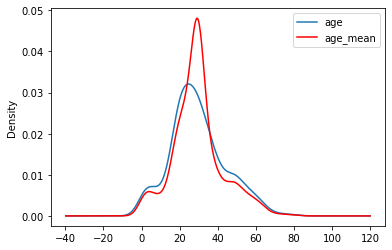

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['age'].plot(kind='kde', ax=ax)
df1['age_mean'].plot(kind='kde', ax=ax, color='red')
line, labels = ax.get_legend_handles_labels()
ax.legend(line, labels, loc='best')

In [43]:
df1['age_median'] = df1['age'].fillna(median)

C:\Users\KC\AppData\Local\Temp/ipykernel_6392/575356346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_median'] = df1['age'].fillna(median)


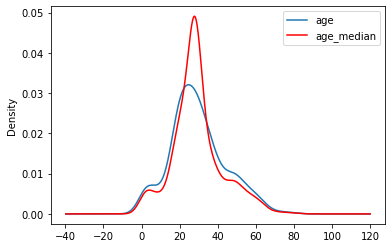

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['age'].plot(kind='kde', ax=ax)
df1['age_median'].plot(kind='kde', ax=ax, color='red')
line, labels = ax.get_legend_handles_labels()
ax.legend(line, labels, loc='best')

In [45]:
df1['age_mode'] = df1['age'].fillna(mode)

C:\Users\KC\AppData\Local\Temp/ipykernel_6392/625498629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_mode'] = df1['age'].fillna(mode)


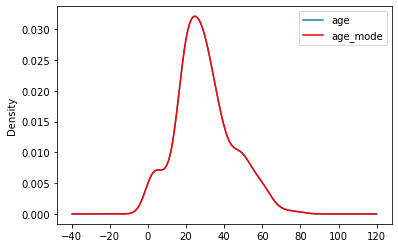

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['age'].plot(kind='kde', ax=ax)
df1['age_mode'].plot(kind='kde', ax=ax, color='red')
line, labels = ax.get_legend_handles_labels()
ax.legend(line, labels, loc='best')

2. Random Sample Imputation

In [78]:
df1.head()

,age,cabin,embarked,boat,body,home.dest,survived,age_mean,age_median,age_mode
0,NaN,NaN,Q,13,NaN,NaN,1,29.519847,28.0,18.0
1,38.0,NaN,S,NaN,NaN,Croatia,0,38.000000,38.0,38.0
2,30.0,NaN,S,NaN,NaN,NaN,0,30.000000,30.0,30.0
3,54.0,NaN,S,4,NaN,"Cornwall / Akron, OH",1,54.000000,54.0,54.0
4,40.0,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,40.000000,40.0,40.0


In [79]:
df1['age'].isnull().sum()

174

In [84]:
df1['age_random']=df1['age'].dropna().sample(df1['age'].isnull().sum(), random_state=0)


C:\Users\KC\AppData\Local\Temp/ipykernel_6392/2785401624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_random']=df1['age'].dropna().sample(df1['age'].isnull().sum(), random_state=0)


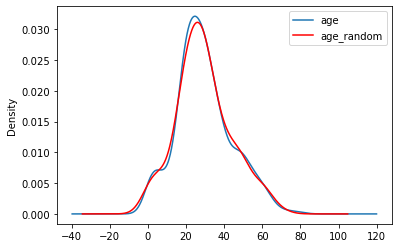

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['age'].plot(kind='kde', ax=ax)
df1['age_random'].plot(kind='kde', ax=ax, color='red')
line, labels = ax.get_legend_handles_labels()
ax.legend(line, labels, loc='best')

3. End of distribution imputation

In [91]:
df1.head()

,age,cabin,embarked,boat,body,home.dest,survived,age_mean,age_median,age_mode,age_random,boat_nan
0,NaN,NaN,Q,13,NaN,NaN,1,29.519847,28.0,18.0,NaN,0
1,38.0,NaN,S,NaN,NaN,Croatia,0,38.000000,38.0,38.0,NaN,1
2,30.0,NaN,S,NaN,NaN,NaN,0,30.000000,30.0,30.0,30.0,1
3,54.0,NaN,S,4,NaN,"Cornwall / Akron, OH",1,54.000000,54.0,54.0,NaN,0
4,40.0,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,40.000000,40.0,40.0,NaN,1


<AxesSubplot:>

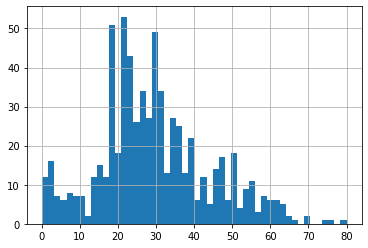

In [99]:
df1['age'].hist(bins=50)

In [103]:
extreme = df1.age.mean()+3*df1.age.std()

E:\Anaconda\ana\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

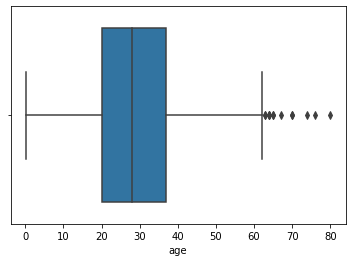

In [104]:
sns.boxplot('age', data=df1)

In [105]:
df1['age_end_of_distribution'] = df1['age'].fillna(extreme)

C:\Users\KC\AppData\Local\Temp/ipykernel_6392/3867433834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_end_of_distribution'] = df1['age'].fillna(extreme)


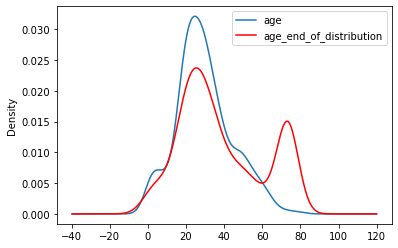

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['age'].plot(kind='kde', ax=ax)
df1['age_end_of_distribution'].plot(kind='kde', ax=ax, color='red')
line, labels = ax.get_legend_handles_labels()
ax.legend(line, labels, loc='best')

4. Arbitray value imputation
-->It consists of replacing NAN by an arbitray value (like replace with whatever you want, mainly used outlier)
disadvantage: Hard tp decide which value to use (it method generally not used)

# Handle missing value for categorical 

1. Frequent category imputation

In [108]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,boat_nan
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1,0
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0,1
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1,0
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0,1


In [115]:
df2 = df[['cabin','home.dest']]

In [116]:
df2.head()

,cabin,home.dest
0,NaN,NaN
1,NaN,Croatia
2,NaN,NaN
3,NaN,"Cornwall / Akron, OH"
4,NaN,"Barre, Co Washington, VT"


In [117]:
df2.groupby(['cabin'])['cabin'].count()

cabin
A14    1
A20    1
A23    1
A24    1
A29    1
      ..
F33    3
F38    1
F4     1
G6     4
T      1
Name: cabin, Length: 135, dtype: int64

In [120]:
x = df['cabin'].value_counts().index[0]

In [121]:
x

'G6'

In [145]:
df2['cabin_na'] = df2['cabin'].fillna(x)

C:\Users\KC\AppData\Local\Temp/ipykernel_6392/391893041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cabin_na'] = df2['cabin'].fillna(x)


In [149]:
df2.drop('cabin_mode', axis=1)

,cabin,home.dest,cabin_na
0,NaN,NaN,G6
1,NaN,Croatia,G6
2,NaN,NaN,G6
3,NaN,"Cornwall / Akron, OH",G6
4,NaN,"Barre, Co Washington, VT",G6
...,...,...,...
845,C39,London / Birmingham,C39
846,B37,"Buffalo, NY",B37
847,NaN,"Moscow / Bronx, NY",G6
848,NaN,NaN,G6


2. Adding a variable to capture NAN

replce nan value with 1, else 0
after, apply frequent category imputation